In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
#import pandas as pd
#import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [ ]:
def resizeplot(l,a):
    plt.figure(figsize=(l,a))

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv('/content/kc_house_data.csv')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.drop('id',inplace=True,axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [ ]:
df['date'] = pd.to_datetime(df['date'])

Now, I'll transform the 'date' column in a usefull column, spliting it in a Year column and Month column.

In [ ]:
df['Month'] = df['date'].apply(lambda date: date.month)
df['Year'] = df['date'].apply(lambda date: date.year)

Let's see the result

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


If you notice, thers,s numbers in the columns "bathroom" and "floors"indicating float numbers, Let's turn them into intigers

In [ ]:
df['bathrooms'] = np.round(df['bathrooms'])
df['floors'] = np.round(df['floors'])

There is some null data ?

In [ ]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Month            0
Year             0
dtype: int64

Yes, just two. Let's clean it

In [ ]:
df.dropna(inplace=True)

Let's drop de 'date column as I mentioned before.

In [ ]:
df.drop('date',inplace=True,axis=1)

In [ ]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.0,1530,1131,3.0,0,0,3,8,...,0,2009,0,98103,47.6993,-122.346,1530,1509,5,2014
21609,400000.0,4,2.0,2310,5813,2.0,0,0,3,8,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2,2015
21610,402101.0,2,1.0,1020,1350,2.0,0,0,3,7,...,0,2009,0,98144,47.5944,-122.299,1020,2007,6,2014
21611,400000.0,3,2.0,1600,2388,2.0,0,0,3,8,...,0,2004,0,98027,47.5345,-122.069,1410,1287,1,2015


In [ ]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Month            0
Year             0
dtype: int64

Starting the visualizations with distplot we can see a density of the Price but if you notice we can see a little bit outliers over 2 million.

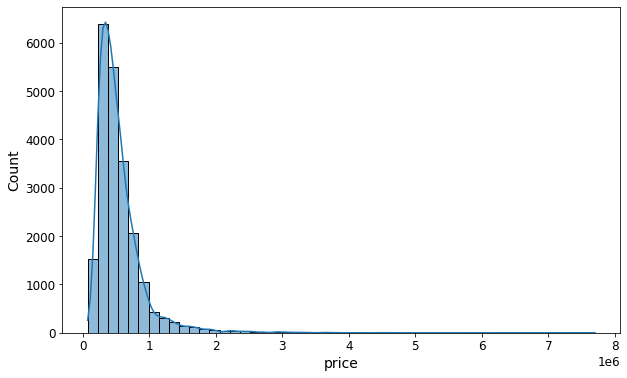

In [ ]:
resizeplot(10,6)
sns.histplot(df['price'],kde=True,bins=50)

Bellow, some of a few correlated features.

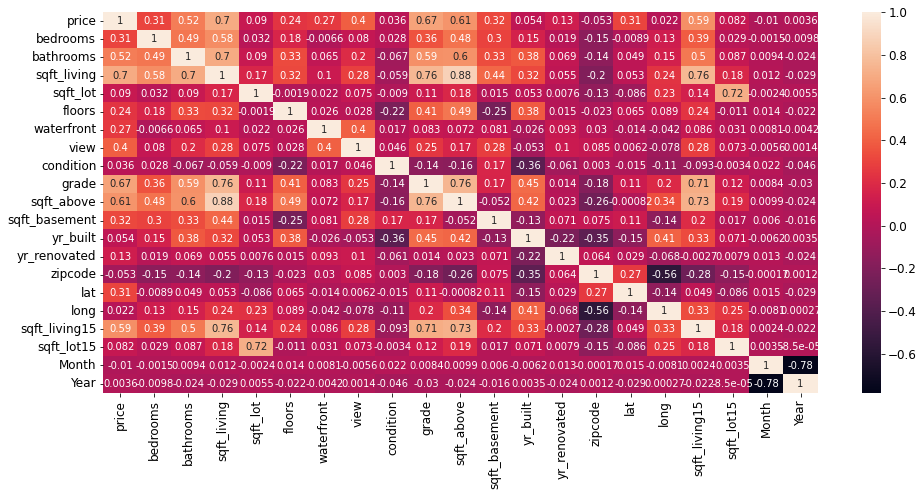

In [ ]:
resizeplot(16,7)
sns.heatmap(df.corr(),annot=True)

Now, let's see how the price changed along the years.

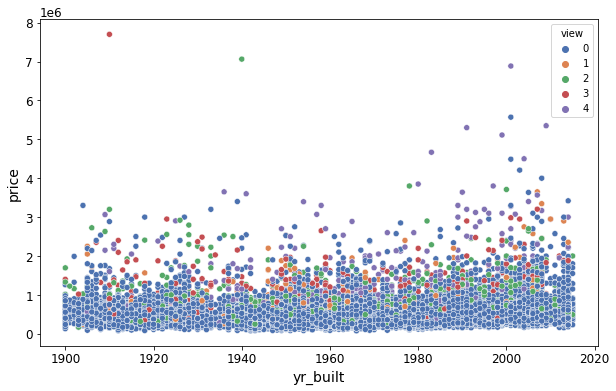

In [ ]:
resizeplot(10,6)
sns.scatterplot(x='yr_built',y='price',data=df,hue='view',palette = 'deep')

As we can see bellow, there is a much more residences without a View than the others.

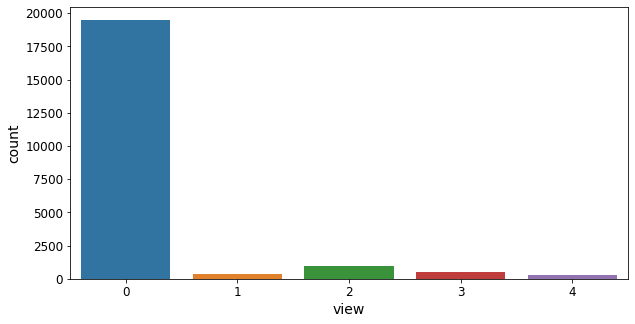

In [ ]:
resizeplot(10,5)
sns.countplot(x='view',data=df)

..and much less waterfront houses.

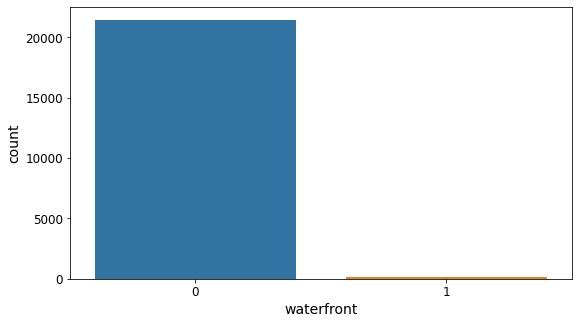

In [ ]:
resizeplot(9,5)
sns.countplot(x='waterfront',data=df)

A linear analysis showing us the increase of the price along the years.

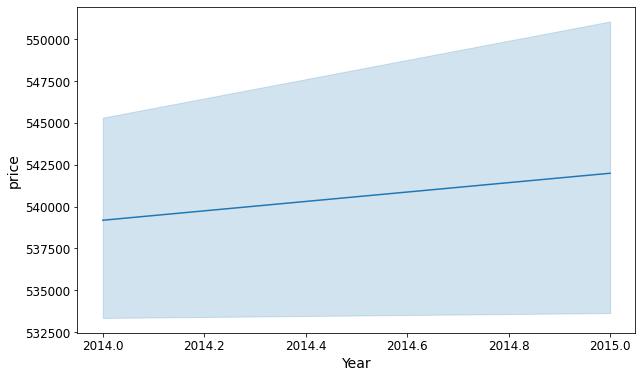

In [ ]:
resizeplot(10,6)
sns.lineplot(x='Year',y='price',data=df)

And of course, the higher the grade the higher the price. Note that, the price does not vary much between 2 and 6, probably due to the similarity of the houses.

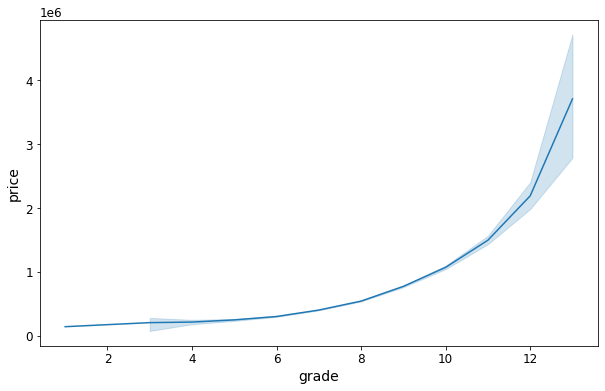

In [ ]:
resizeplot(10,6)
sns.lineplot(x='grade',y='price',data=df,palette='terrain')

Let's visualyze for another perspective.

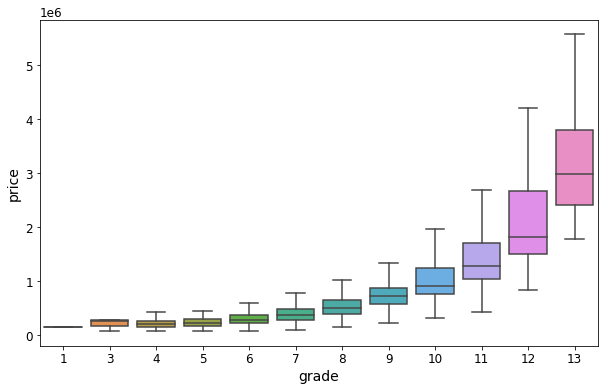

In [ ]:
resizeplot(10,6)
sns.boxplot(x='grade',y='price',data=df,showfliers=False)

<Figure size 720x432 with 0 Axes>

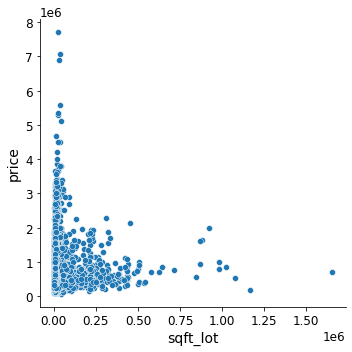

In [ ]:
resizeplot(10,6)
sns.relplot(x='sqft_lot',y='price',data=df,palette='terrain')

Now, let's do an analysis relating the number of rooms with a view to the price of the property.

In [ ]:
print('Mean of 1 room with view: ',df.loc[(df['waterfront']==1)&(df['bedrooms']==1)]['price'].mean())

Mean of 1 room with view:  622680.0


In [ ]:
print('Mean of 2 rooms with view: ',df.loc[(df['waterfront']==
1)&(df['bedrooms']==2)]['price'].mean())

Mean of 2 rooms with view:  918567.4838709678


In [ ]:
print('Mean of 2 rooms without view: ',df.loc[(df['waterfront']==0)&(df['bedrooms']==2)]['price'].mean())

Mean of 2 rooms without view:  395497.62183950166


In [ ]:
print('Mean of 3 rooms with view: ',df.loc[(df['waterfront']==1)&(df['bedrooms']==3)]['price'].mean())

Mean of 3 rooms with view:  1526424.21875


In [ ]:
print('Mean of 3 rooms without view: ',df.loc[(df['waterfront']==0)&(df['bedrooms']==3)]['price'].mean())

Mean of 3 rooms without view:  459279.99887295085


In [ ]:
print('Mean of 4 rooms with view: ',df.loc[(df['waterfront']==1)&(df['bedrooms']==4)]['price'].mean())

Mean of 4 rooms with view:  1928485.0


Relating the number of bathrooms with the price.

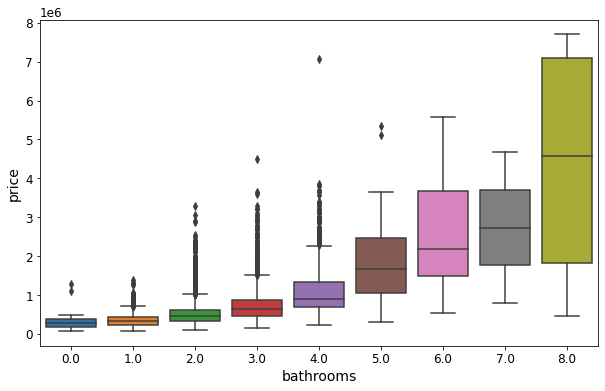

In [ ]:
resizeplot(10,6)
sns.boxplot(x='bathrooms',y='price',data=df)

We can see that the residences have more houses with 3 and 4 bedrooms than the others, which leads us to realize that there are several other attributes that value the house and not just bedrooms and bathrooms.

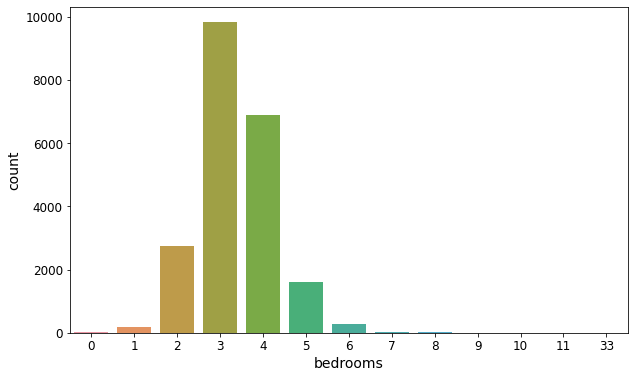

In [ ]:
resizeplot(10,6)
sns.countplot(x='bedrooms',data=df)


Let's start creating our models

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [ ]:
X = df[['bedrooms','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
       'grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15']].values
y = df['price'].values

In [ ]:
X

array([[3.000e+00, 3.000e+00, 1.000e+00, ..., 0.000e+00, 1.340e+03,
        5.650e+03],
       [3.000e+00, 3.000e+00, 2.000e+00, ..., 4.000e+02, 1.690e+03,
        7.639e+03],
       [2.000e+00, 2.000e+00, 1.000e+00, ..., 0.000e+00, 2.720e+03,
        8.062e+03],
       ...,
       [2.000e+00, 2.000e+00, 1.000e+00, ..., 0.000e+00, 1.020e+03,
        2.007e+03],
       [3.000e+00, 3.000e+00, 2.000e+00, ..., 0.000e+00, 1.410e+03,
        1.287e+03],
       [2.000e+00, 2.000e+00, 1.000e+00, ..., 0.000e+00, 1.020e+03,
        1.357e+03]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

Normalize the data.

In [ ]:
std = StandardScaler()

In [ ]:
X = std.fit_transform(X)

RANDOM FOREST REGRESSOR

In [ ]:
rfr = RandomForestRegressor(n_estimators=200)

In [ ]:
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [ ]:
score_rfr = rfr.score(X_train,y_train)

In [ ]:
prev_rfr = rfr.predict(X_test)

In [ ]:
mae_rfr = mean_absolute_error(y_test,prev_rfr)

In [ ]:
mse_rfr = mean_squared_error(y_test,prev_rfr)

In [ ]:
rmse_rfr = np.sqrt(mean_squared_error(y_test,prev_rfr))

In [ ]:
print('Mae: ',mae_rfr)
print('Mse: ',mse_rfr)
print('Rmse: ',rmse_rfr)

Mae:  127533.23894688724
Mse:  39372179688.6709
Rmse:  198424.24168601702


In [ ]:
print(score_rfr)

0.9607493668327549


In [ ]:
preco_rfr = df['price']
predict_rfr = pd.Series(prev_rfr)
error_rfr = preco_rfr-predict_rfr
data_rfr = {'Price':preco_rfr,'Predictions':predict_rfr,'Error':error_rfr}
data_prev_rfr = pd.DataFrame(data_rfr)
data_prev_rfr.head()

,Price,Predictions,Error
0,221900.0,491947.200,-270047.200
1,538000.0,295681.895,242318.105
2,180000.0,473548.320,-293548.320
3,604000.0,554995.620,49004.380
4,510000.0,423152.795,86847.205


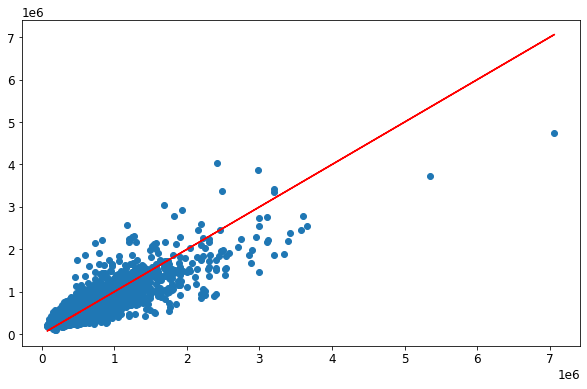

In [ ]:
resizeplot(10,6)
plt.scatter(y_test,prev_rfr)
plt.plot(y_test,y_test,color='red')

Linear Regression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
pred_lr = lr.predict(X_test)

In [ ]:
score_lr = lr.score(X_train,y_train)

In [ ]:
print(score_lr)

0.6043031188326218


In [ ]:
lr.coef_[0]

-18458.880064065725

In [ ]:
lr.intercept_

-698942.8152410674

In [ ]:
mae_lr = mean_absolute_error(y_test,pred_lr)
mse_lr = mean_squared_error(y_test,pred_lr)
rmse_lr = np.sqrt(mse_lr)

In [ ]:
print('Mae_lr: ',mae_lr)
print('Mse_lr: ',mse_lr)
print('Rmse_lr: ',rmse_lr)

Mae_lr:  153022.04437311893
Mse_lr:  53279914535.023964
Rmse_lr:  230824.42361029296


In [ ]:
preco_lr = df['price']
predict_lr = pd.Series(pred_lr)
error_lr = preco_lr-predict_lr
data_lr = {'Price':preco_lr,'Predictions':predict_lr,'Error':error_lr}
data_prev_lr = pd.DataFrame(data_lr)
data_prev_lr.head()

,Price,Predictions,Error
0,221900.0,384226.691377,-162326.691377
1,538000.0,187578.606361,350421.393639
2,180000.0,650856.856125,-470856.856125
3,604000.0,756782.209561,-152782.209561
4,510000.0,428318.974165,81681.025835


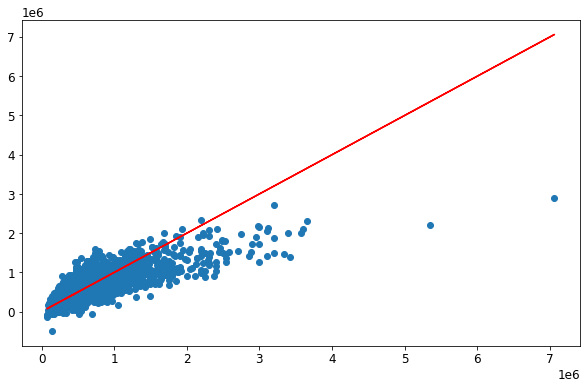

In [ ]:
resizeplot(10,6)
plt.scatter(y_test,pred_lr)
plt.plot(y_test,y_test,color='red')

POLYNOMIAL REGRESSION

In [ ]:
poly = PolynomialFeatures(degree=4)

In [ ]:
X_train_poly = poly.fit_transform(X_train)

In [ ]:
X_test_poly = poly.transform(X_test)

In [ ]:
lr.fit(X_train_poly,y_train)

LinearRegression()

In [ ]:
score_poly = lr.score(X_train_poly,y_train)

In [ ]:
pred_poly = lr.predict(X_test_poly)

In [ ]:
pred_poly[0]

403329.34609588544

In [ ]:
mae_poly = mean_absolute_error(y_test,pred_poly)
mse_poly = mean_squared_error(y_test,pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test,pred_poly))

In [ ]:
print('Mae_poly:',mae_poly)
print('Mse_poly:',mse_poly)
print('Rmse_poly:',rmse_poly)

Mae_poly: 299706.5161254753
Mse_poly: 76581042522012.8
Rmse_poly: 8751059.508540254


DECISION TREE REGRESSOR

In [ ]:
dtr = DecisionTreeRegressor(random_state=0)

In [ ]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
pred_dtr = dtr.predict(X_test)

In [ ]:
score_dtr = dtr.score(X_train,y_train)

In [ ]:
print(score_dtr)

0.9993695212129043


In [ ]:
mae_dtr = mean_absolute_error(y_test,pred_dtr)
mse_dtr = mean_squared_error(y_test,pred_dtr)
rmse_dtr = np.sqrt(mse_dtr)

In [ ]:
print('Mae_dtr: ',mae_dtr)
print('Mse_dtr: ',mse_dtr)
print('Rmse_dtr: ',rmse_dtr)

Mae_dtr:  171977.9496452807
Mse_dtr:  78462416068.2232
Rmse_dtr:  280111.4350900784


In [ ]:
price_dtr = df['price']
predict_dtr = pd.Series(pred_dtr)
error_dtr = price_dtr-predict_dtr
data_dtr = {'Price':price_dtr,'Predictions':predict_dtr,'Error':error_dtr}
data_prev_dtr = pd.DataFrame(data_dtr)
data_prev_dtr.head()

,Price,Predictions,Error
0,221900.0,450000.0,-228100.0
1,538000.0,280000.0,258000.0
2,180000.0,320000.0,-140000.0
3,604000.0,500000.0,104000.0
4,510000.0,319990.0,190010.0


In [ ]:
data_prev_dtr['Percentage_error'] = np.abs(data_prev_dtr[ 'Error'])*100/data_prev_dtr['Price']

In [ ]:
data_prev_dtr.head()

,Price,Predictions,Error,Percentage_error
0,221900.0,450000.0,-228100.0,102.794051
1,538000.0,280000.0,258000.0,47.955390
2,180000.0,320000.0,-140000.0,77.777778
3,604000.0,500000.0,104000.0,17.218543
4,510000.0,319990.0,190010.0,37.256863


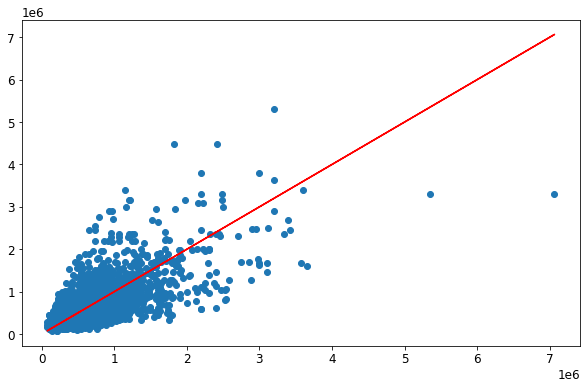

In [ ]:
resizeplot(10,6)
plt.scatter(y_test,pred_dtr)
plt.plot(y_test,y_test,color='red')

KNN REGRESSORMM

In [ ]:
knr = KNeighborsRegressor(n_neighbors = 10)

In [ ]:
knr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [ ]:
score_knr = knr.score(X_train,y_train)

In [ ]:
print(score_knr)

0.5877089633385993


In [ ]:
pred_knr = knr.predict(X_test)

In [ ]:
mae_knr = mean_absolute_error(y_test,pred_knr)
mse_knr = mean_squared_error(y_test,pred_knr)
rmse_knr = np.sqrt(mse_knr)

In [ ]:
print('Mae_knr: ',mae_knr)
print('Mse_knr: ',mse_knr)
print('Rmse_knr: ',rmse_knr)

Mae_knr:  159045.15314620605
Mse_knr:  66206788257.063354
Rmse_knr:  257306.79792237


In [ ]:
price_knr = df['price']
predict_knr = pd.Series(pred_knr)
error_knr = price_dtr-predict_knr
data_knr = {'Price':price_knr,'Predictions':predict_knr,'Error':error_knr}
data_prev_knr = pd.DataFrame(data_knr)
data_prev_knr.head()

,Price,Predictions,Error
0,221900.0,488750.0,-266850.0
1,538000.0,292645.0,245355.0
2,180000.0,681505.3,-501505.3
3,604000.0,591800.0,12200.0
4,510000.0,419076.0,90924.0


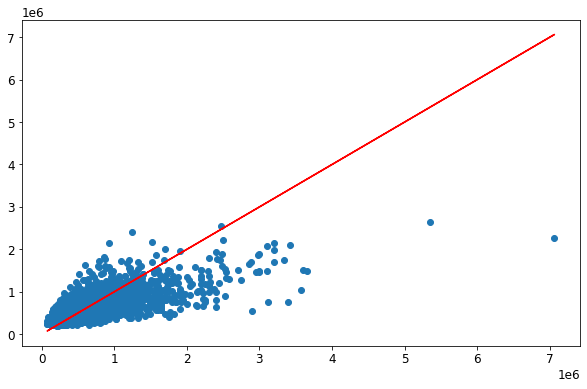

In [ ]:
resizeplot(10,6)
plt.scatter(y_test,pred_knr)
plt.plot(y_test,y_test,color='red')

XGBOOST

In [ ]:
xgb = XGBRegressor()

In [ ]:
xgb.fit(X_train,y_train)

[06:49:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
pred_xgb = xgb.predict(X_test)

In [ ]:
score_xgb = xgb.score(X_train,y_train)

In [ ]:
print(score_xgb)

0.7619692341847513


In [ ]:
mae_xgb = mean_absolute_error(y_test,pred_xgb)
mse_xgb = mean_squared_error(y_test,pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test,pred_xgb))

In [ ]:
print('Mae_xgb: ',mae_xgb)
print('Mse_xgb: ',mse_xgb)
print('Rmse_xgb: ',rmse_xgb)

Mae_xgb:  131818.59756226867
Mse_xgb:  40219393466.11978
Rmse_xgb:  200547.7336349623


In [ ]:
price_xgb = df['price']
predict_xgb = pd.Series(pred_xgb)
error_xgb = price_xgb-predict_xgb
data_xgb = {'Price':price_xgb,'Predictions':predict_xgb,'Error':error_xgb}
data_prev_xgb = pd.DataFrame(data_xgb)
data_prev_xgb.head()

,Price,Predictions,Error
0,221900.0,489901.56250,-268001.56250
1,538000.0,280211.53125,257788.46875
2,180000.0,507233.46875,-327233.46875
3,604000.0,636465.62500,-32465.62500
4,510000.0,390759.37500,119240.62500


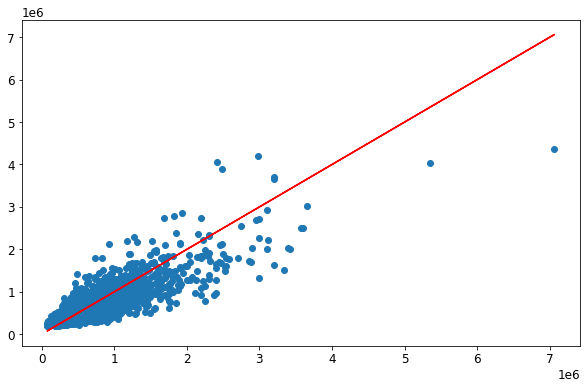

In [ ]:
resizeplot(10,6)
plt.scatter(y_test,pred_xgb)
plt.plot(y_test,y_test,color='red')

In [ ]:
print('Decision Tree Regressor: ',round(score_dtr,3), '->', 'Rmse_DTR: ',rmse_dtr)
print('Random Forrest Regressor: ', round(score_rfr,3), '->', 'Rmse_RFR: ',rmse_rfr)
print('XGBOOST Regressor: ', round(score_xgb,3),'Rmse_XGB:','->',rmse_xgb)
print('Polynomial Regressor: ', round(score_poly,3),'->','Rmse_POLY: ',rmse_poly)
print('Linear Regression: ', round(score_lr,3),'Rmse_LR: ','->',rmse_lr)
print('KNN Regressor: ', round(score_knr,3),'Rmse_KNN: ','->',rmse_knr)

Decision Tree Regressor:  0.999 -> Rmse_DTR:  280111.4350900784
Random Forrest Regressor:  0.961 -> Rmse_RFR:  198424.24168601702
XGBOOST Regressor:  0.762 Rmse_XGB: -> 200547.7336349623
Polynomial Regressor:  0.745 -> Rmse_POLY:  8751059.508540254
Linear Regression:  0.604 Rmse_LR:  -> 230824.42361029296
KNN Regressor:  0.588 Rmse_KNN:  -> 257306.79792237


It is important to note that although Decision Tree gave us a 99% score, the Random Forest Regressor dos algorithm gave a lower score, 95%, however the mean square error was lower than Decision tree. In that case it will depend on what the analyst looks for in relation to the data and whether this average value will be and well above what he wants or enough enough for the insight of his business.